In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('E:/Guvi/GDP 2020-2025 (Visualization & Clustering/2020-2025.csv')

In [6]:
df.head()

,Country,2020,2021,2022,2023,2024,2025
0,Afghanistan,20136,14278.0,14501.0,17248.0,NaN,NaN
1,Albania,15271,18086.0,19185.0,23388.0,27259.0,28372.0
2,Algeria,164774,185850.0,225709.0,247789.0,264913.0,268885.0
3,Andorra,2885,3325.0,3376.0,3786.0,4038.0,4035.0
4,Angola,66521,84375.0,142442.0,109764.0,115946.0,113343.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  196 non-null    object 
 1   2020     196 non-null    int64  
 2   2021     194 non-null    float64
 3   2022     194 non-null    float64
 4   2023     194 non-null    float64
 5   2024     192 non-null    float64
 6   2025     189 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 10.8+ KB


In [8]:
df.describe()

,2020,2021,2022,2023,2024,2025
count,1.960000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.920000e+02,1.890000e+02
mean,4.378886e+05,5.043504e+05,5.255064e+05,5.486173e+05,5.756871e+05,5.991414e+05
std,1.942936e+06,2.220864e+06,2.347886e+06,2.453040e+06,2.573189e+06,2.693421e+06
min,5.200000e+01,6.200000e+01,6.100000e+01,6.300000e+01,6.500000e+01,6.500000e+01
25%,9.588000e+03,1.114175e+04,1.265000e+04,1.360450e+04,1.350050e+04,1.421400e+04
50%,3.533450e+04,3.771900e+04,4.156800e+04,4.363100e+04,4.713550e+04,4.782900e+04
75%,2.074810e+05,2.546132e+05,2.746308e+05,2.850355e+05,2.915108e+05,3.032930e+05
max,2.135412e+07,2.368118e+07,2.600690e+07,2.772072e+07,2.918490e+07,3.050722e+07


In [9]:
df.isnull().sum()

Country    0
2020       0
2021       2
2022       2
2023       2
2024       4
2025       7
dtype: int64

In [10]:
for i in range(1,6):
    year = f'202{i}'
    display(df[df[year].isnull()])

,Country,2020,2021,2022,2023,2024,2025
54,Eritrea,1982,NaN,NaN,NaN,NaN,NaN
169,Syria,60043,NaN,NaN,NaN,NaN,NaN


,Country,2020,2021,2022,2023,2024,2025
54,Eritrea,1982,NaN,NaN,NaN,NaN,NaN
169,Syria,60043,NaN,NaN,NaN,NaN,NaN


,Country,2020,2021,2022,2023,2024,2025
54,Eritrea,1982,NaN,NaN,NaN,NaN,NaN
169,Syria,60043,NaN,NaN,NaN,NaN,NaN


,Country,2020,2021,2022,2023,2024,2025
0,Afghanistan,20136,14278.0,14501.0,17248.0,NaN,NaN
54,Eritrea,1982,NaN,NaN,NaN,NaN,NaN
169,Syria,60043,NaN,NaN,NaN,NaN,NaN
192,Palestine,15532,18109.0,19166.0,17848.0,NaN,NaN


,Country,2020,2021,2022,2023,2024,2025
0,Afghanistan,20136,14278.0,14501.0,17248.0,NaN,NaN
54,Eritrea,1982,NaN,NaN,NaN,NaN,NaN
96,Lebanon,24976,19782.0,24748.0,23607.0,28280.0,NaN
131,Pakistan,300410,348481.0,374850.0,337754.0,373078.0,NaN
161,Sri Lanka,84304,88609.0,74584.0,83723.0,98964.0,NaN
169,Syria,60043,NaN,NaN,NaN,NaN,NaN
192,Palestine,15532,18109.0,19166.0,17848.0,NaN,NaN


In [11]:

df_2020 = df[['Country', '2020']]

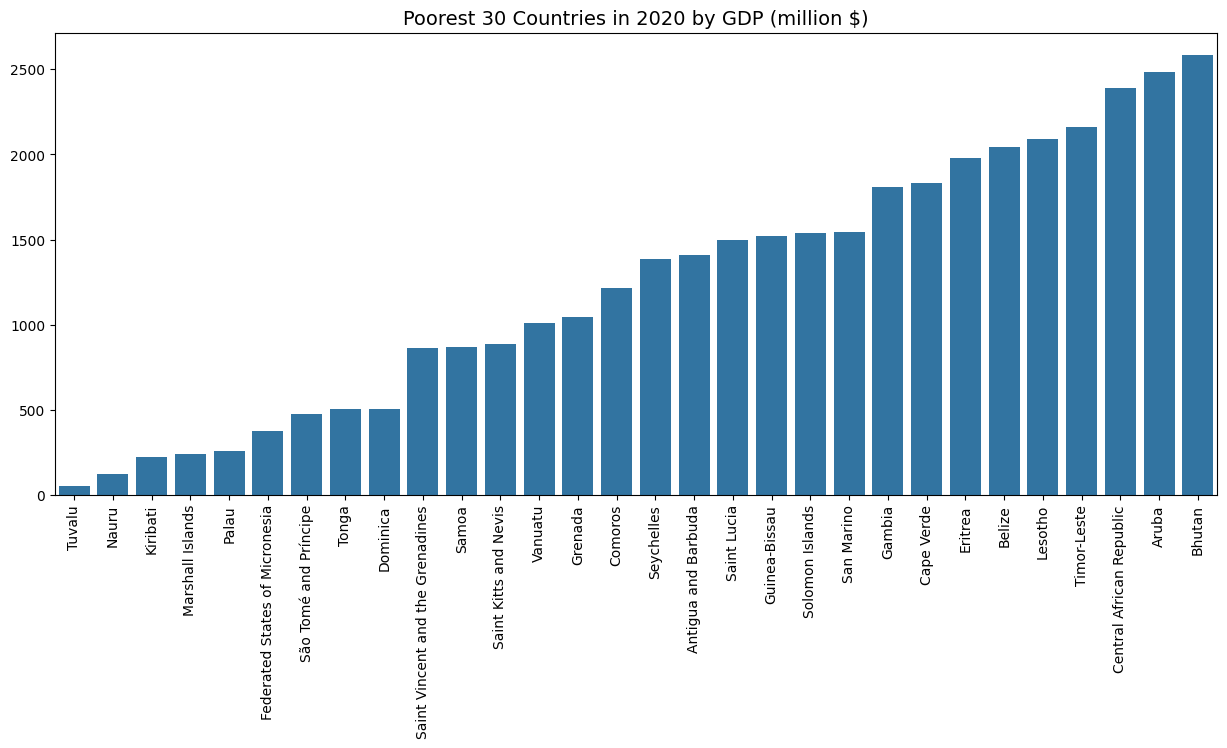

In [12]:
poorest_2020 = df_2020.sort_values(by='2020').iloc[:30, :]

plt.figure(figsize=(15,6))

sns.barplot(x=poorest_2020.Country, y=poorest_2020['2020'])
plt.xticks(rotation=90)

plt.title('Poorest 30 Countries in 2020 by GDP (million $)', fontsize=14)
plt.ylabel('')
plt.xlabel('')

plt.show()

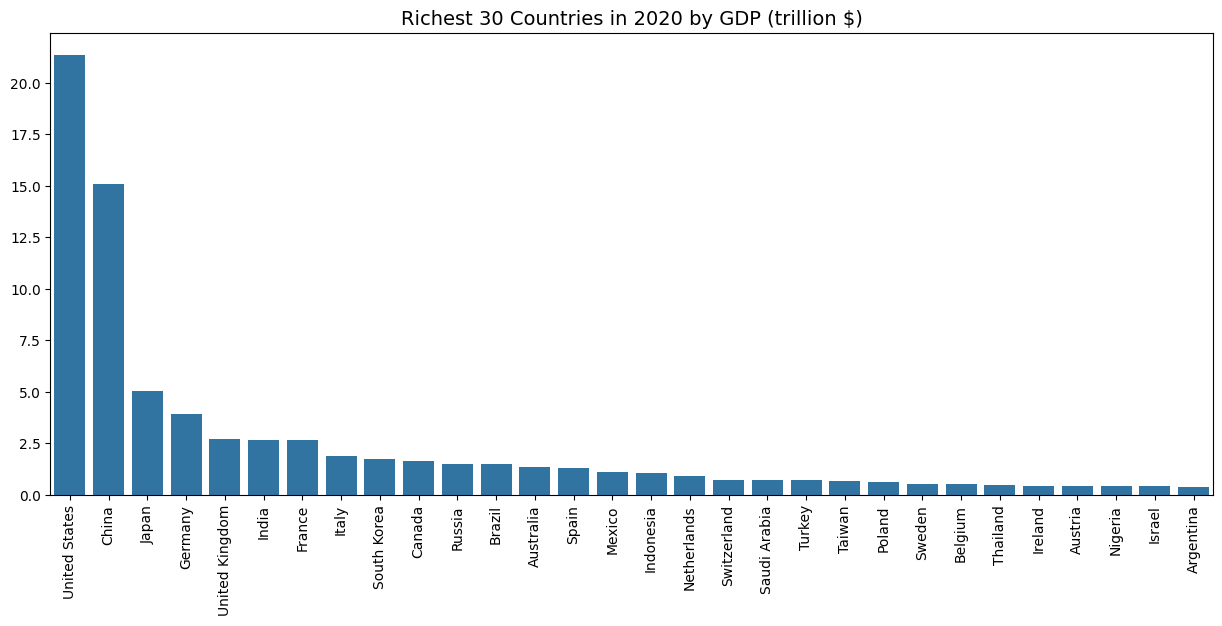

In [13]:
df_2020.sort_values(by='2020', ascending=False).iloc[:30, :]

richest_2020 = df_2020.sort_values(by='2020', ascending=False).iloc[:30, :]

plt.figure(figsize=(15,6))

sns.barplot(x=richest_2020.Country, y=richest_2020['2020']/1000000)
plt.xticks(rotation=90)

plt.title('Richest 30 Countries in 2020 by GDP (trillion $)', fontsize=14)
plt.ylabel('')
plt.xlabel('')

plt.show()

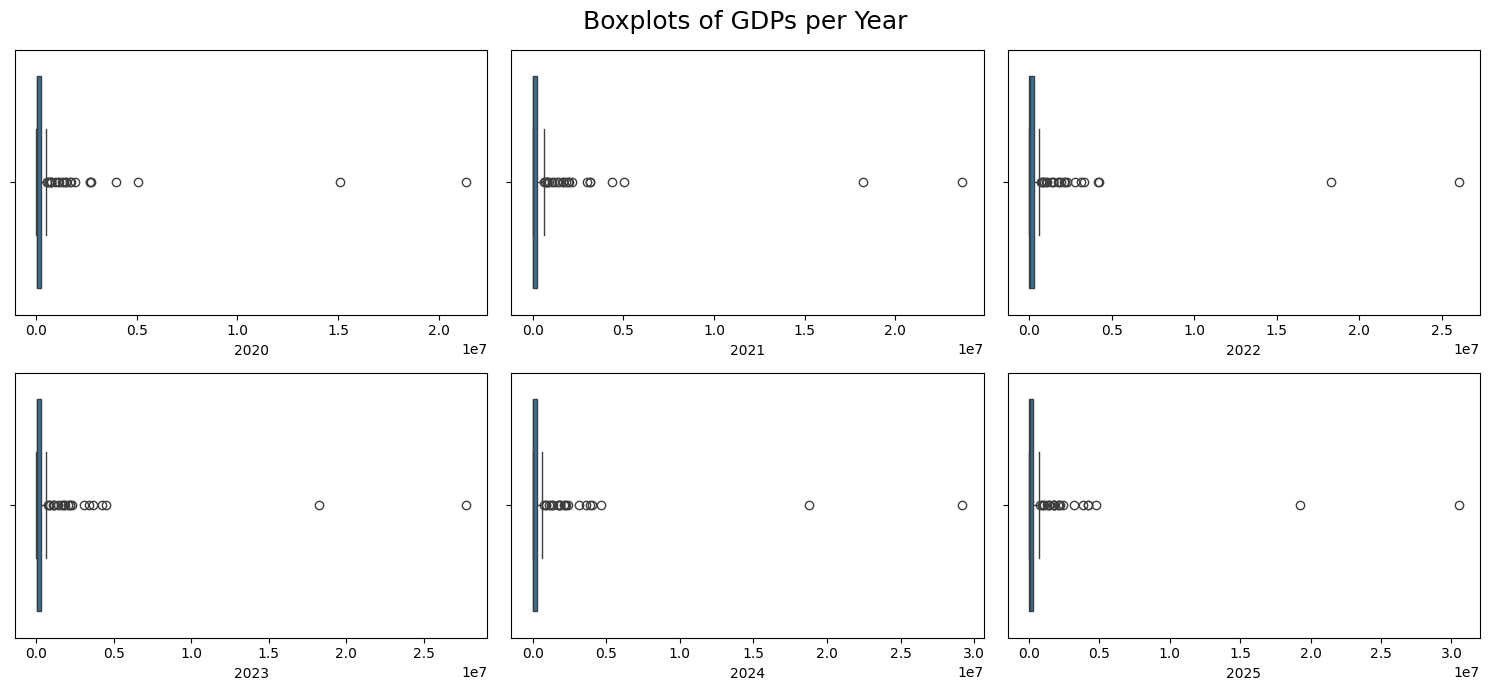

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,7))
ax = axes.flatten()

for i in range(6):
    year = f'202{i}'
    sns.boxplot(data=df, x=df[year], ax=ax[i])

plt.suptitle('Boxplots of GDPs per Year', fontsize=18)

plt.tight_layout()
plt.show()

In [15]:
df['diff'] = round((df['2025'] - df['2020']) / df['2020'] * 100, 2)

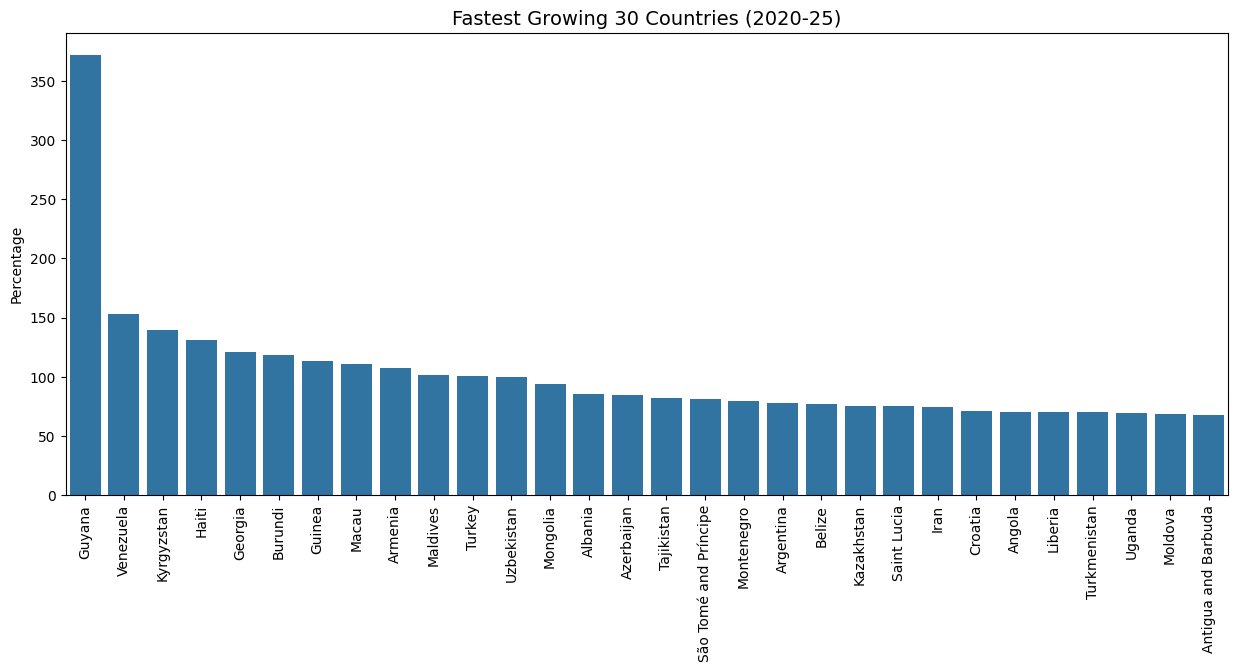

In [16]:
fast_growth = df.sort_values(by='diff', ascending=False).iloc[:30, :]

plt.figure(figsize=(15,6))

sns.barplot(data=fast_growth, x='Country', y='diff')
plt.xticks(rotation=90)

plt.title('Fastest Growing 30 Countries (2020-25)', fontsize=14)
plt.ylabel('Percentage')
plt.xlabel('')

plt.show()

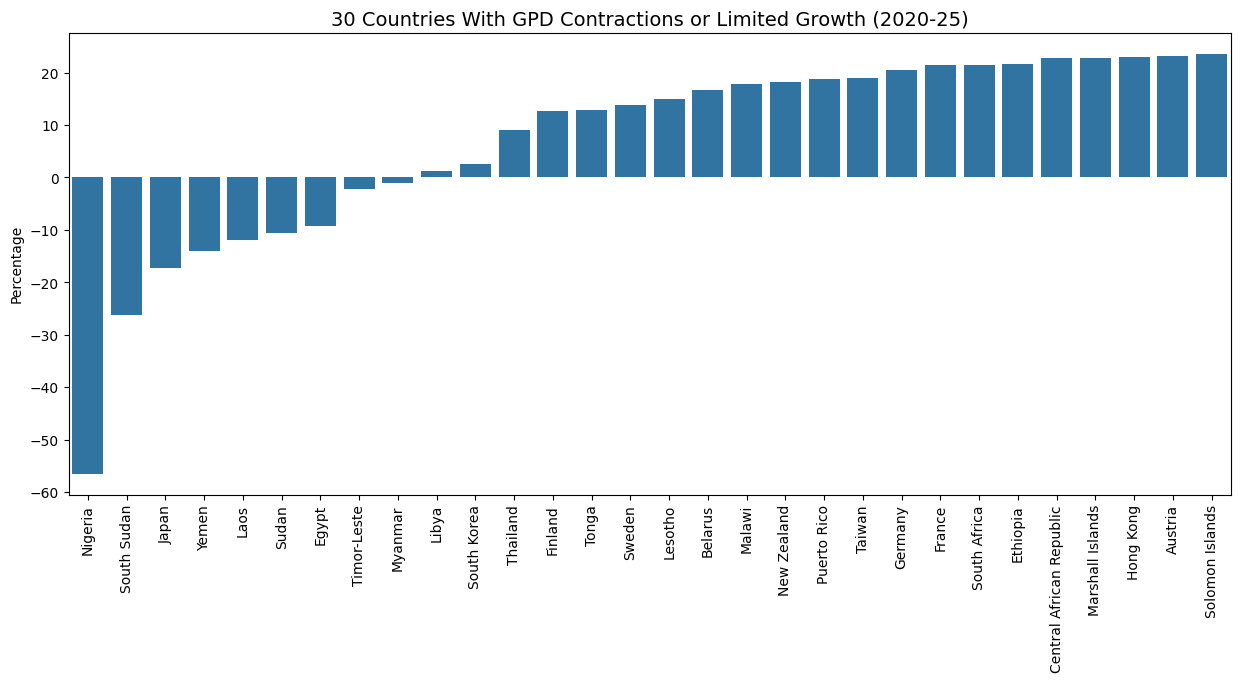

In [17]:
shrinking = df.sort_values(by='diff').iloc[:30, :]

plt.figure(figsize=(15,6))

sns.barplot(data=shrinking, x='Country', y='diff')
plt.xticks(rotation=90)

plt.title('30 Countries With GPD Contractions or Limited Growth (2020-25)', fontsize=14)
plt.ylabel('Percentage')
plt.xlabel('')

plt.show()

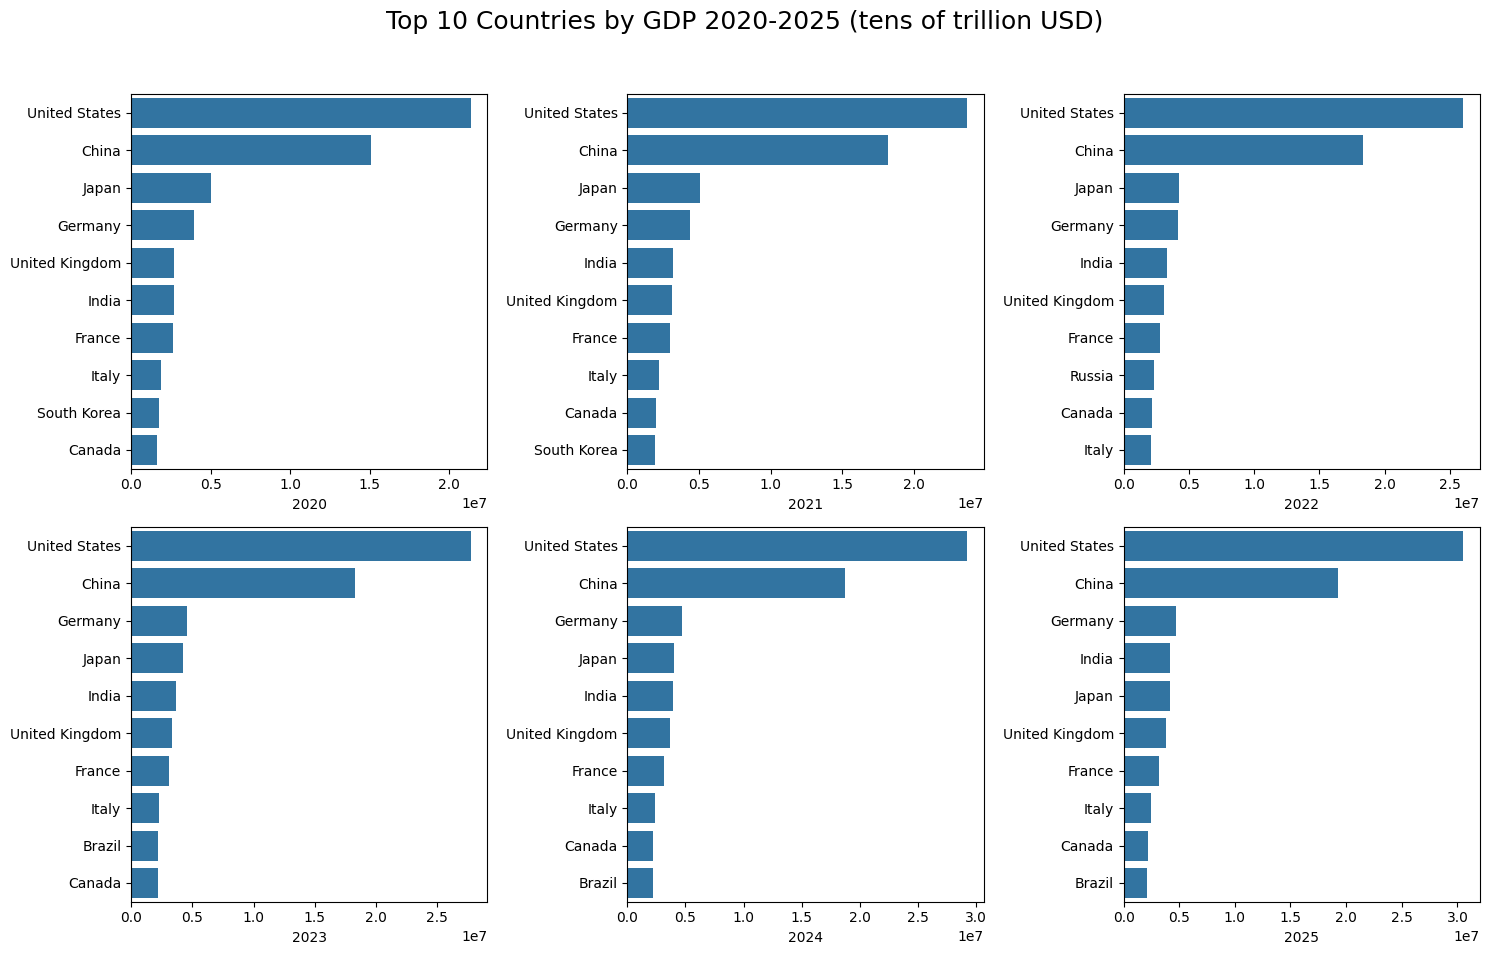

In [18]:
years = ['2020', '2021', '2022', '2023', '2024', '2025']

fig, axes = plt.subplots(2,3, figsize=(15, 10))
ax = axes.flatten()

for i, year in enumerate(years):
    top10 = df[['Country', year]].sort_values(by=year, ascending=False).iloc[:10, :]
    sns.barplot(data=top10, x=year, y='Country', ax=ax[i])
    ax[i].set_ylabel('')

plt.suptitle('Top 10 Countries by GDP 2020-2025 (tens of trillion USD)', fontsize=18)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [19]:
eu_countries = [
    "Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", 
    "Czechia", "Denmark", "Estonia", "Finland", "France", 
    "Germany", "Greece", "Hungary", "Ireland", "Italy", 
    "Latvia", "Lithuania", "Luxembourg", "Malta", "Netherlands", 
    "Poland", "Portugal", "Romania", "Slovakia", "Slovenia", 
    "Spain", "Sweden"
]

df_eu = df[df.Country.isin(eu_countries)]

data = {
    'Country' : ['European Union'],
    '2020' : [df_eu['2020'].sum()], 
    '2021' : [df_eu['2021'].sum()],
    '2022' : [df_eu['2022'].sum()],
    '2023' : [df_eu['2023'].sum()],
    '2024' : [df_eu['2024'].sum()],
    '2025' : [df_eu['2025'].sum()]
}

eu = pd.DataFrame(data)

df2 = pd.concat([df, eu], ignore_index=True)

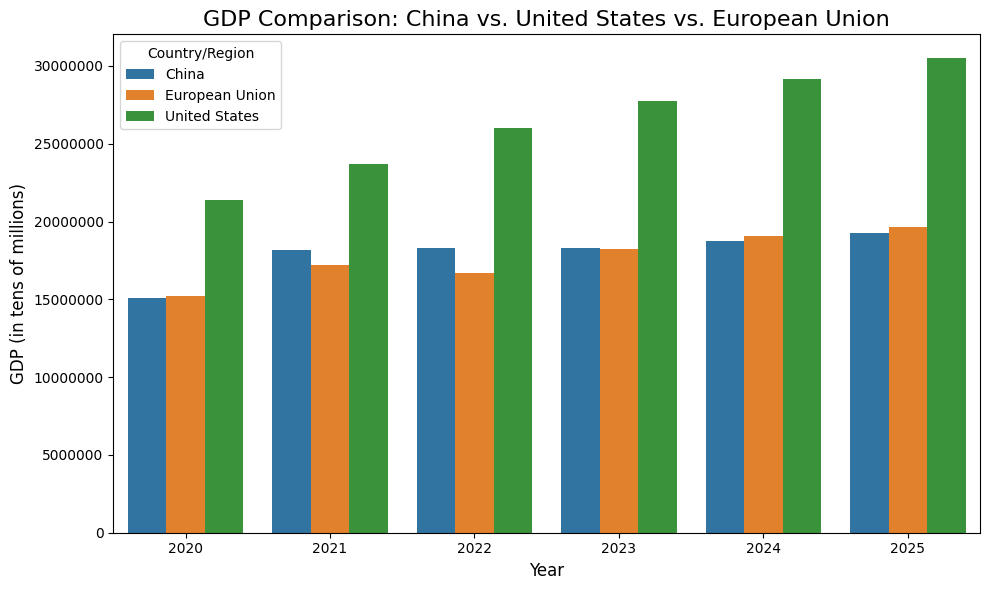

In [20]:
top3 = df2[df2.Country.isin(['China', 'United States', 'European Union'])].drop('diff', axis=1).sort_values(by='2025')

df_long = top3.melt(id_vars=['Country'], 
                       var_name='Year', 
                       value_name='GDP')

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=df_long, 
    x='Year', 
    y='GDP', 
    hue='Country',
    palette='tab10'
)

ax.set_title('GDP Comparison: China vs. United States vs. European Union', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('GDP (in tens of millions)', fontsize=12)
plt.xticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.legend(title='Country/Region')
plt.show()

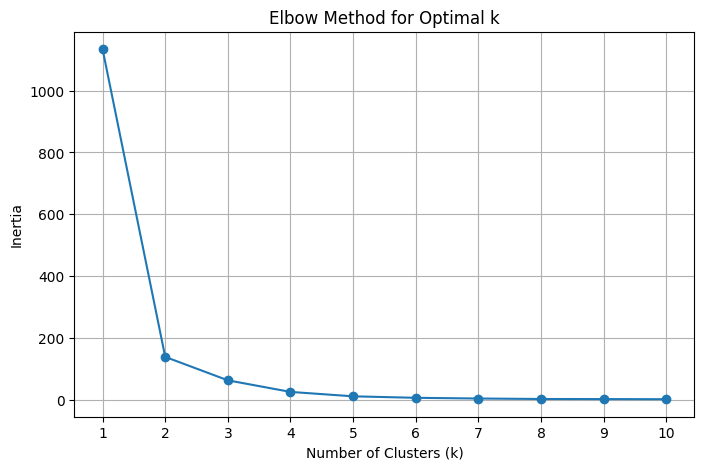

In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df_cluster = df.drop('diff', axis=1).copy()
df_cluster.dropna(inplace=True)
features = df_cluster.loc[:, '2020':'2025']

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

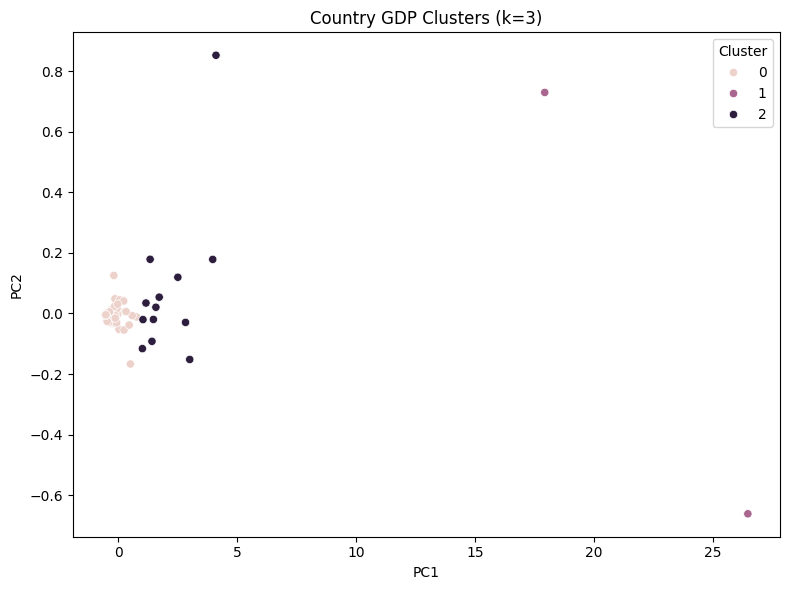


Countries grouped by 3 clusters:

--- Cluster 0 ---
Albania, Algeria, Andorra, Angola, Antigua and Barbuda, Argentina, Armenia, Aruba, Austria, Azerbaijan, Bahamas, Bahrain, Bangladesh, Barbados, Belarus, Belgium, Belize, Benin, Bhutan, Bolivia, Bosnia and Herzegovina, Botswana, Brunei, Bulgaria, Burkina Faso, Burundi, Cape Verde, Cambodia, Cameroon, Central African Republic, Chad, Chile, Colombia, Comoros, Democratic Republic of the Congo, Republic of the Congo, Costa Rica, Ivory Coast, Croatia, Cyprus, Czech Republic, Denmark, Djibouti, Dominica, Dominican Republic, Ecuador, Egypt, El Salvador, Equatorial Guinea, Estonia, Eswatini, Ethiopia, Fiji, Finland, Gabon, Gambia, Georgia, Ghana, Greece, Grenada, Guatemala, Guinea, Guinea-Bissau, Guyana, Haiti, Honduras, Hong Kong, Hungary, Iceland, Indonesia, Iran, Iraq, Ireland, Israel, Jamaica, Jordan, Kazakhstan, Kenya, Kiribati, Kosovo, Kuwait, Kyrgyzstan, Laos, Latvia, Lesotho, Liberia, Libya, Lithuania, Luxembourg, Macau, Madagascar, M

In [22]:
OPTIMAL_K = 3

kmeans = KMeans(n_clusters=OPTIMAL_K, n_init=10, random_state=42)
df_cluster['Cluster'] = kmeans.fit_predict(features_scaled)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df_cluster['Cluster'].values
df_pca['Country'] = df_cluster['Country'].values

plt.figure(figsize=(8,6))
sns.scatterplot(df_pca, x='PC1', y='PC2', hue='Cluster')

plt.title(f'Country GDP Clusters (k={OPTIMAL_K})')

plt.tight_layout()
plt.show()

print(f"\nCountries grouped by {OPTIMAL_K} clusters:")
for i in range(OPTIMAL_K):
    print(f"\n--- Cluster {i} ---")
    countries_in_cluster = df_cluster[df_cluster['Cluster'] == i]['Country'].tolist()
    print(", ".join(countries_in_cluster))